### Cluster Final for Benz

Cluster analysis final for Machine Learning, Spring 2018 at Parsons School of Design. Analyzing a dataset of ~400 pieces of art of various mediums and clustering them by their metadata.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
%matplotlib inline

## read and describe the metadata

In [2]:
fpn_csv = '/Users/benz0/Desktop/MachineLearning/Assignment_3/cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')
data = data.replace(np.NaN, 'undefined')

In [3]:
# get column names
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

##### Creating dummy variables for qualitative data

In [4]:
data2 = pd.get_dummies(data['primary_medium'])
data3 = pd.get_dummies(data['art_movement'])

In [5]:
# data.head(20)
data2.head(20)
data3.head(20)

,COBRA,Neo-Concrete Movement,ZERO,abstract expressionism,abstraction,arte povera,assemblage,collage,conceptual,constructivism,...,op art,pop art,postminimal,postmod,pre-raphaelite,representation,supports/surfaces,suprematism,surrealism,undefined
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Combining the datasets into data4

In [6]:
data4 = pd.concat([data, data2, data3], axis=1, join_axes=[data.index])

In [7]:
data4.head(20)

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,op art,pop art,postminimal,postmod,pre-raphaelite,representation,supports/surfaces,suprematism,surrealism,undefined
0,128,Jackson Pollock,Yellow Islands,abstract expressionism,Tate,America,False,painting,"painting, oil on canvas",144 x 185 cm,...,0,0,0,0,0,0,0,0,0,0
1,141,Ad Reinhardt,Abstract Painting No. 5,abstract expressionism,Tate,America,False,painting,"painting, oil on canvas",152 x 152 cm,...,0,0,0,0,0,0,0,0,0,0
2,153,Mark Rothko,Untitled,abstract expressionism,MoMA also Tate,America,False,painting,"painting, watercolor & gouache on paper",55 x 76 cm,...,0,0,0,0,0,0,0,0,0,0
3,360,Mark Rothko,No. 5/No. 24,abstract expressionism,MoMA,Latvia / America,False,painting,"painting, oil on canvas",86 x 128 cm,...,0,0,0,0,0,0,0,0,0,0
4,364,Clyfford Still,1944-N No. 2,abstract expressionism,MoMA,America,False,painting,"painting, oil on canvas",265 x 221 cm,...,0,0,0,0,0,0,0,0,0,0
5,5,Gillian Avery,Distillation,abstraction,Tate,UK,False,painting,"painting, oil, household paint on hardboard",213 x 152 cm,...,0,0,0,0,0,0,0,0,0,0
6,6,Joseph (Jef) Banc,Pair-Bearing Matrix,abstraction,Tate,France,False,painting,"painting, mixed media on canvas",73 x 60 cm,...,0,0,0,0,0,0,0,0,0,0
7,10,Willi Baumeister,Untitled (Suspended Lines I),abstraction,Tate,Germany,False,print,"print, lithograph on paper",26 x 21 cm,...,0,0,0,0,0,0,0,0,0,0
8,13,FrÌ©dÌ©ric Benrath,Untitled,abstraction,Tate,France,False,print,"print, lithograph on paper",43 x 29 cm,...,0,0,0,0,0,0,0,0,0,0
9,17,Sandra Blow,Space and Matter,abstraction,Tate,UK,False,painting,"painting, oil on hardboard",152 x 123 cm,...,0,0,0,0,0,0,0,0,0,0


## create a subset of the columns you will use to fit KMeans

Here, I am **arbitrarily** choosing the seven [visual variables defined by Bertin](http://www.infovis-wiki.net/index.php?title=Visual_Variables#Jaques_Bertin). Variable descriptions [here](https://github.com/visualizedata/ml/blob/master/ML_assignment_3/contents-of-cluster_images.csv). 

You should choose the columns that you decide will best define the clusters. You may need to make transformations on existing variables. 

In [9]:
list(data4)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes',
 'drawing',
 'installation',
 'painting',
 'photography',
 'print',
 'sculpture',
 'video_film',
 'COBRA',
 'Neo-Concrete Movement',
 'ZERO',
 'abstract expressionism',
 'abstraction',
 'arte povera',
 'assemblage',
 'collage',
 'conceptual',
 'constructivism',
 'cubism',
 'dada',
 'fluxus',
 'futurism',
 'gutai',
 'kinetic art',
 'land art',
 'minimalism',
 'modernism',
 'op art',
 'pop art',
 'postminimal',
 'postmod',
 'pre-raphaelite',
 'representation',
 'supports/surfaces',
 'suprematism',
 'surrealism',
 'undefined']

##### Choosing features

Undefined for art movement has 170 pieces, the largest grouping, so I wanted to define that using the primary medium of those undefine as a way to find definition in those undefined pieces. With that, I wanted to add some other features I thought were important like texture, shape, colors, value, and a later add of orientation because it supported textures by weighing in on the changes in orientation.

I later added point, line, and area which helped a lot with pairings. I was specifically happy with seeing the Koons sculpture with the marbles because that was one of the few pieces I thought could be paired with Koons' poodle.

I ended up dropping 'installations' because it had the least number within the undefined category, and I wanted my clusters to better give a home to the undefined art movement pieces. I also dropped 'painting' because it had the greatest number of undefined and also the greatest number of pieces in primary medium. I figured this would help normalize the weights of features and that they can be defined by other features. Paintings also come in so many variations, such as oil, acrylic, watercolor, and so on, so it's hard to give it such a broad (brush)stroke.

I did not include video-film because there were only 3 pieces. I also did not include any art movements that had under ~20 pieces. I wanted them to find a cluster based on their other, more prominent features, rather than pull other pieces towards/away from them or create their own tiny cluster.

In [113]:
# X = data[['art_movement', 'date', 'primary_medium', 'te', 'co', 'sh']]
# X_quant_features = data[['te', 'co', 'sh', 'pl', 'si', 'va', 'or', 'po', 'li', 'ar', 'primary_medium']]
# X_quant_features = data4[['installation', 'painting', 'drawing', 'sculpture', 'print', 'photography', 'abstraction', 'conceptual', 'representation']]
X_quant_features = data4[['drawing', 'sculpture', 'print', 'photography', 'abstraction', 'conceptual', 'representation', 'te', 'sh', 'co', 'va', 'or', 'po', 'li', 'ar' ]]

In [51]:
X_quant_features.head()

,installation,drawing,sculpture,print,abstraction,representation,representation,te,sh,co,va,or
0,0,0,0,0,0,False,0,2,4,0,0,4
1,0,0,0,0,0,False,0,2,3,0,5,0
2,0,0,0,0,0,False,0,2,4,0,1,0
3,0,0,0,0,0,False,0,4,4,4,4,0
4,0,0,0,0,0,False,0,2,4,2,4,1


# KMeans

In [114]:
from sklearn.cluster import KMeans

## plot inertia scores by number of clusters

I didn't think it necessary to look at more than 40 clusters because the elbow is below that. So I decreased the range to see more details on the differences between 1 to 40.

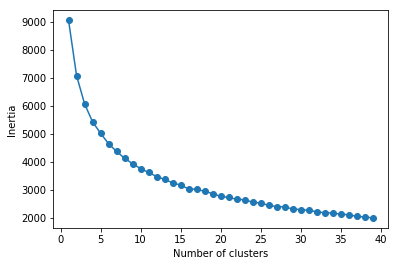

In [115]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 40):
    km = KMeans(n_clusters=i)
    km.fit(X_quant_features)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 40), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## create silhouette plots to assess various specifications for `n_clusters` in `KMeans`

I was looking at different bumps in the intertia and also trying to get a general sense of the silhouette score by looking at a large list of clusters.

In [116]:
# modify this list to include the numbers of clusters you want to see
range_n_clusters = [9, 10, 11, 12, 13, 15, 16, 18, 25, 27, 33, 35]

For n_clusters = 9 The average silhouette_score is : 0.181593432571


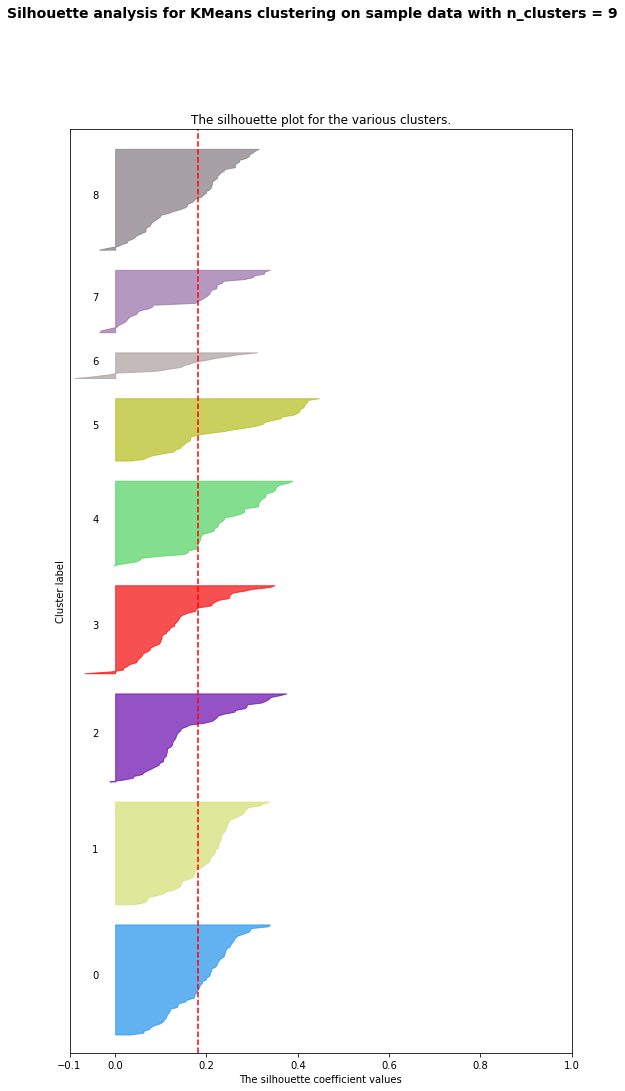

For n_clusters = 10 The average silhouette_score is : 0.179034523927


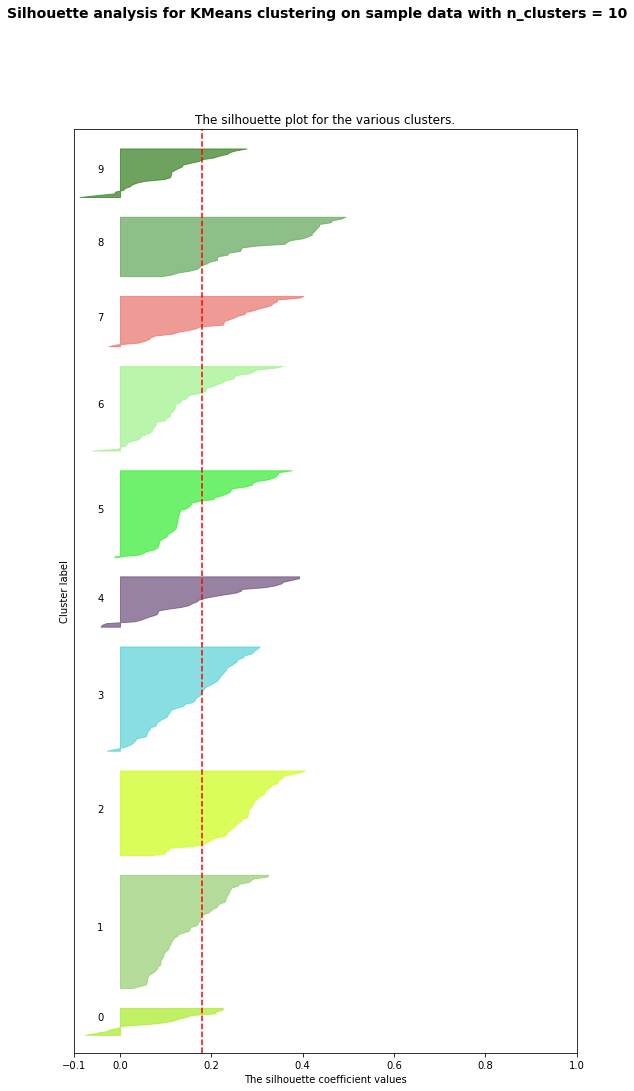

For n_clusters = 11 The average silhouette_score is : 0.173418733879


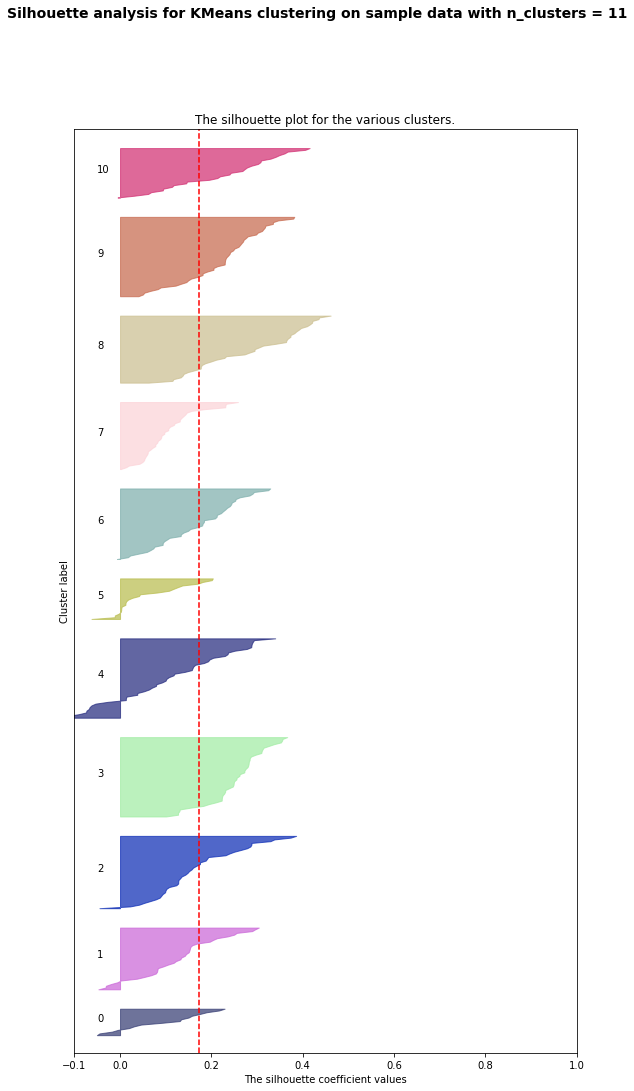

For n_clusters = 12 The average silhouette_score is : 0.170609933883


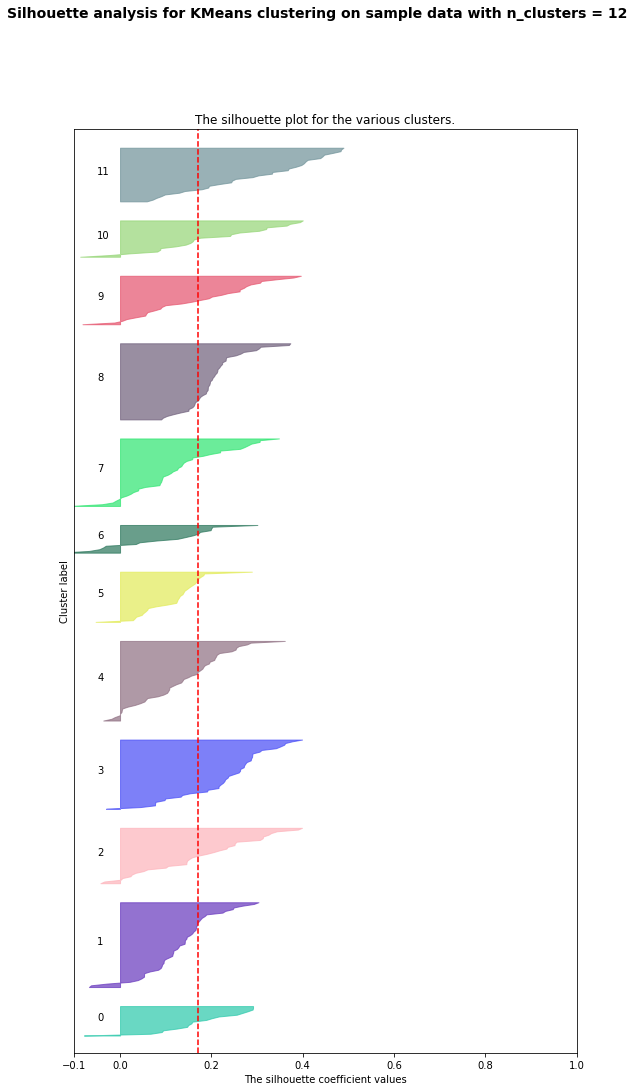

For n_clusters = 13 The average silhouette_score is : 0.18240447799


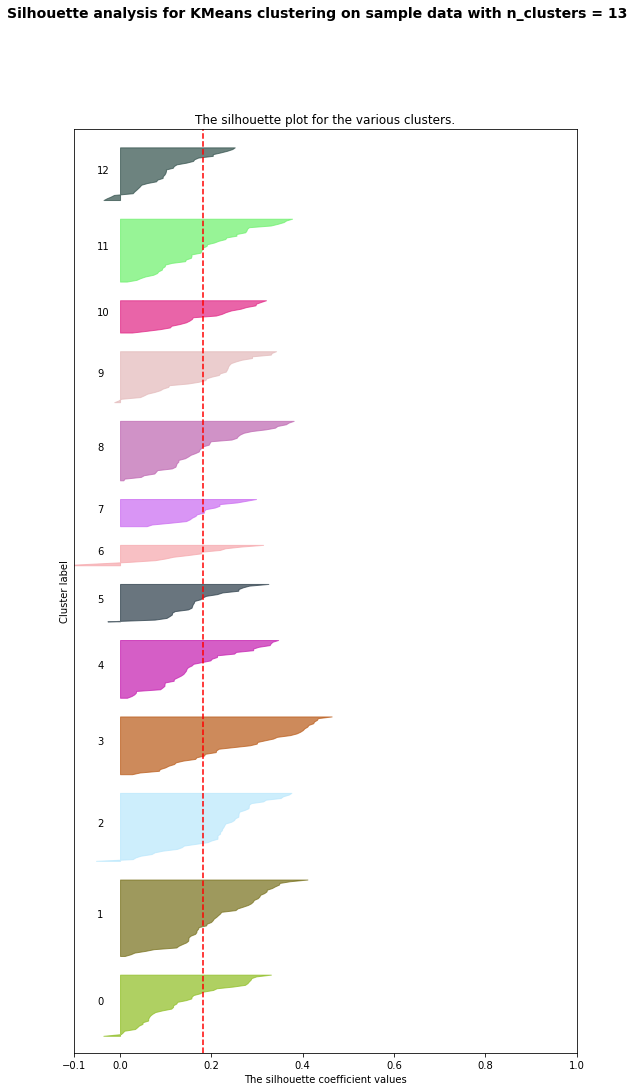

For n_clusters = 15 The average silhouette_score is : 0.180975909502


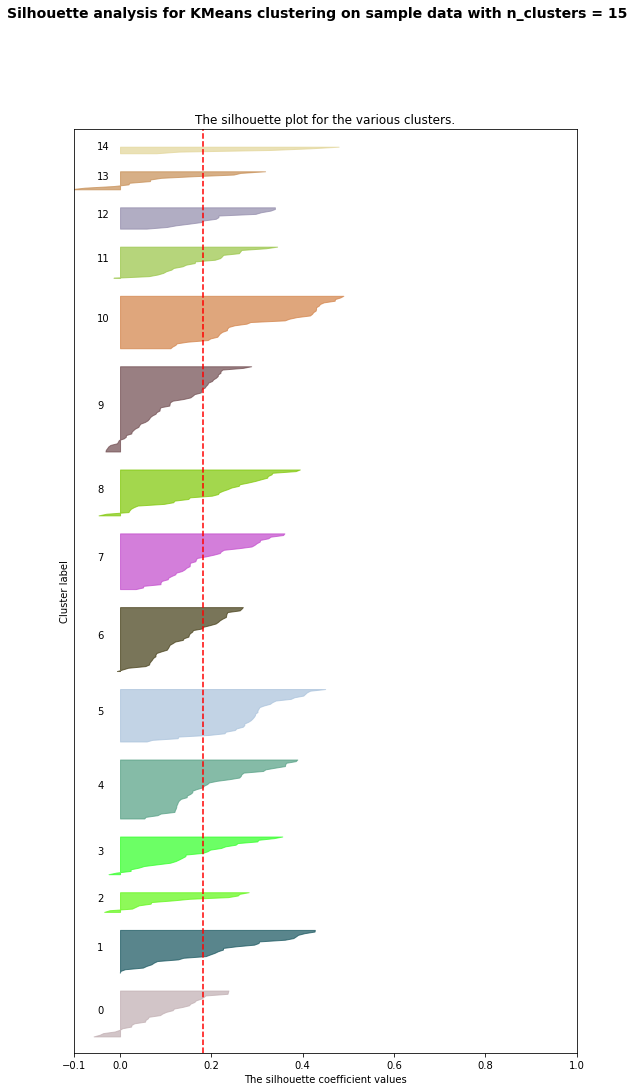

For n_clusters = 16 The average silhouette_score is : 0.166489893476


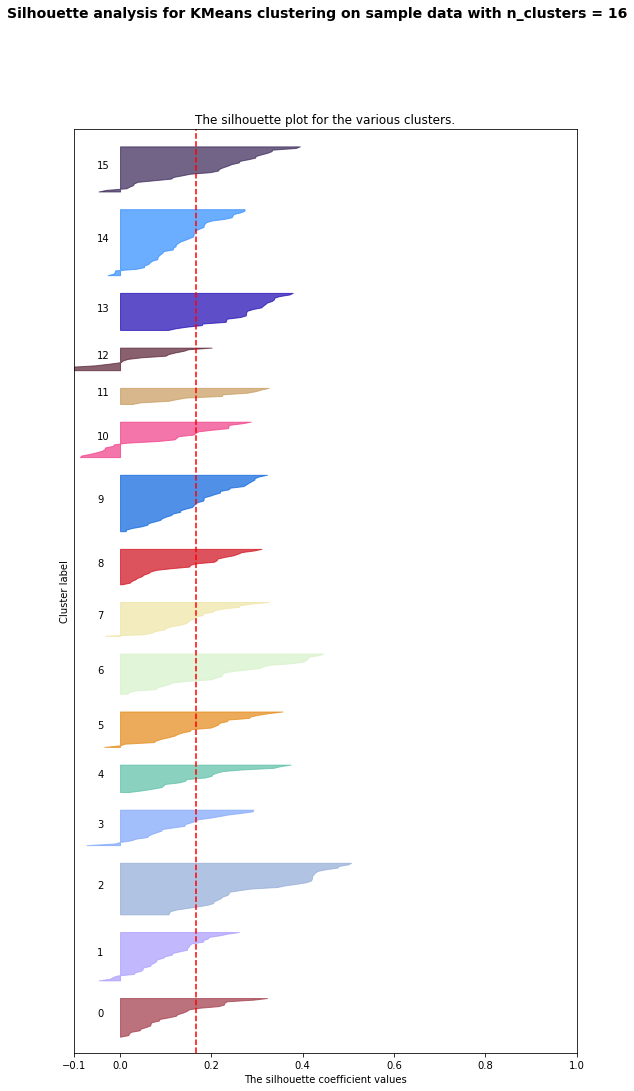

For n_clusters = 18 The average silhouette_score is : 0.166519977999


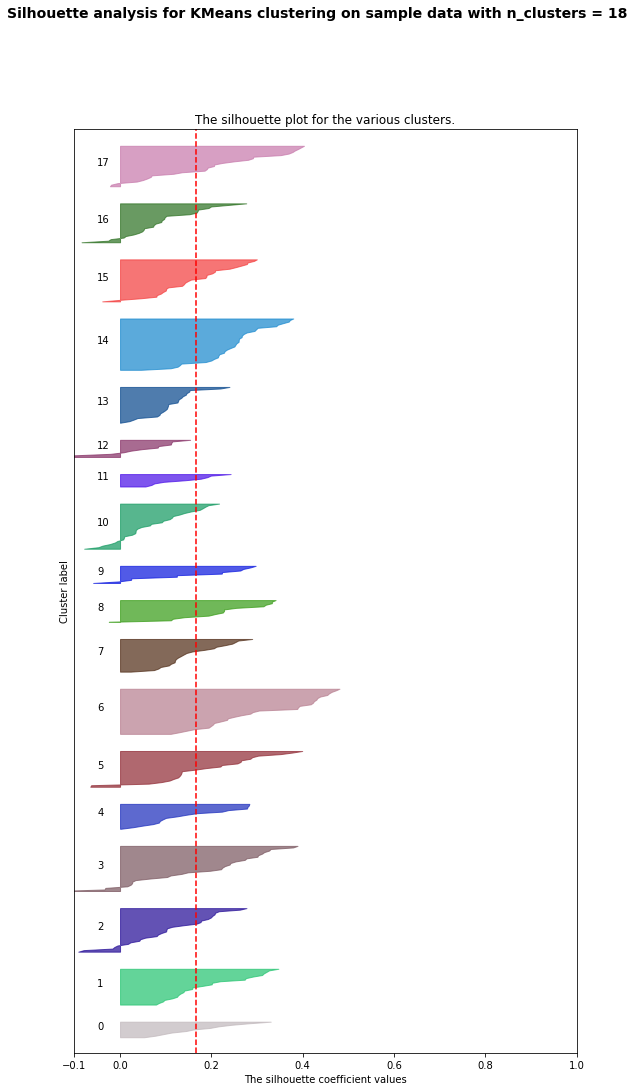

For n_clusters = 25 The average silhouette_score is : 0.176828174391


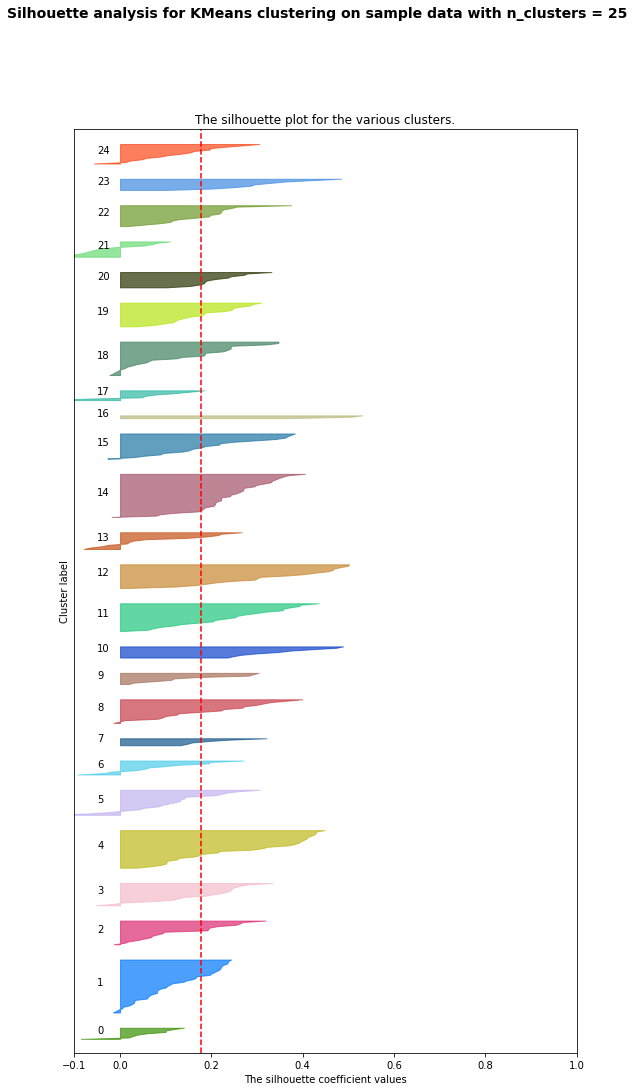

For n_clusters = 27 The average silhouette_score is : 0.169393208492


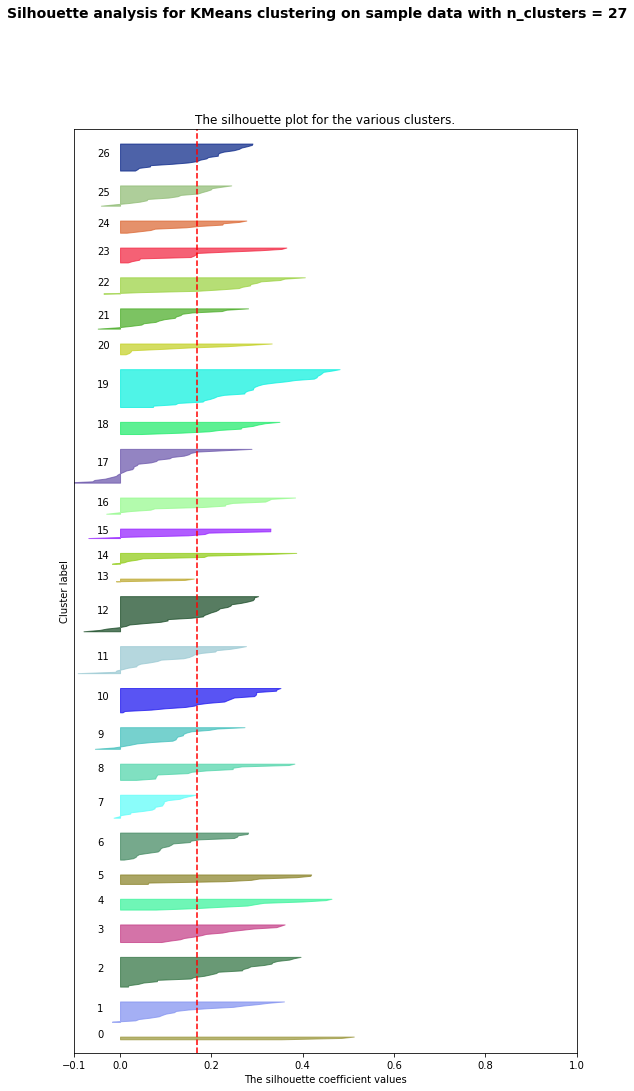

For n_clusters = 33 The average silhouette_score is : 0.173393807654


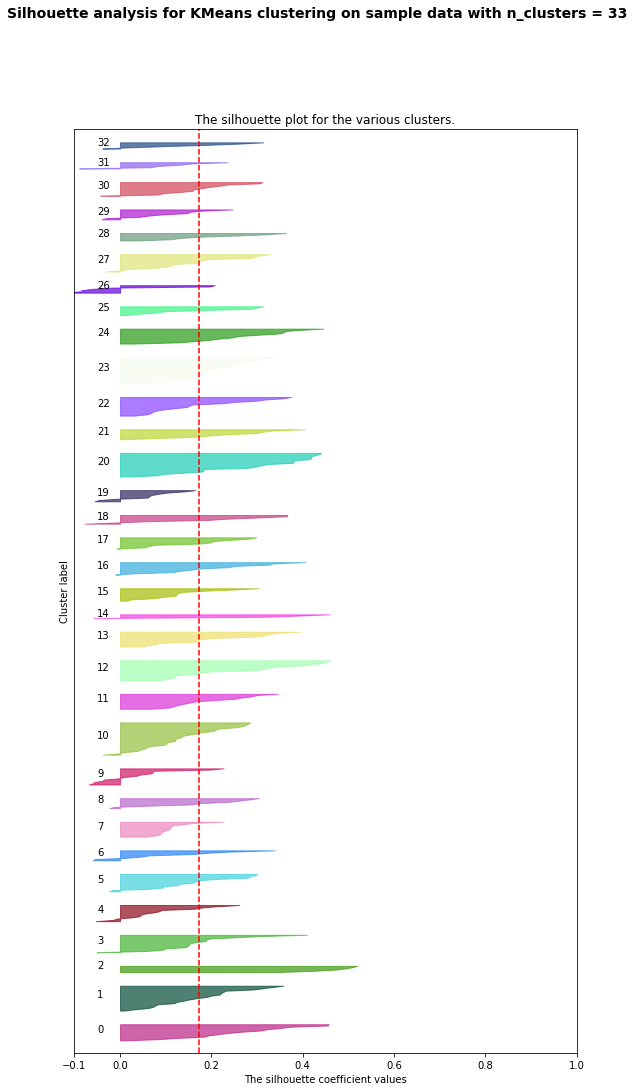

For n_clusters = 35 The average silhouette_score is : 0.172806104098


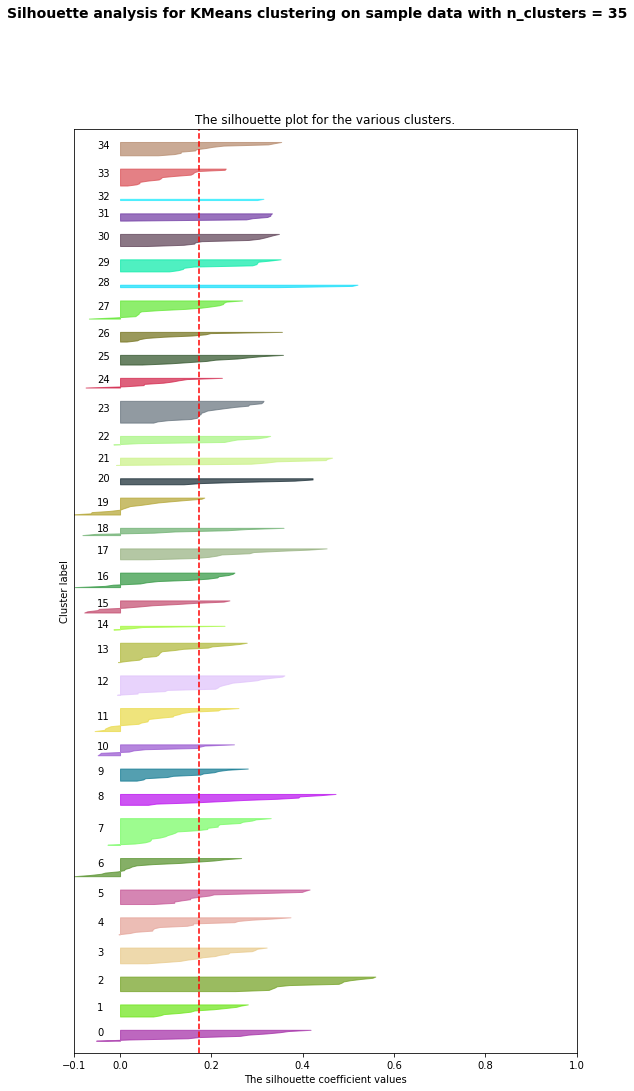

In [117]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_quant_features) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_quant_features)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X_quant_features, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_quant_features, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## Final Fit

I chose 15 clusters because they had some pretty good solid silhouettes and negatives that weren't too drastic.

From there, I changed some of the specs for K-Means, such as increasing max iterations to have it be able to run more iterations, tolerance (relative tolerance with regards to inertia to declare convergence -- not sure what this means), n_init (number of time the k-means algorithm will be run with different centroid seeds -- it then gives me the best one, so I wasn't afraid of increasing this number), and lastly increasing the number of jobs to use for computing to all CPUs (I figured the more CPU power the better).

In [121]:
# set the number of clusters in the final model
my_n_clusters = 15

In [122]:
km = KMeans(n_clusters=my_n_clusters, max_iter=1000, tol=0.001, n_init=30, n_jobs=-1)
km.fit(X_quant_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=15, n_init=30, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.001, verbose=0)

## Results

I was happy with this clustering after looking at hundreds of iterations. There were art pieces that I wanted to match with others, and this one had a lot of good matches. I was in the mindset of if I think these pieces would go well in an exhibit together as a curator. Not all had to match, but the majority had to have what I called 'friends'. I was thinking more like a playlist where not all the songs are the same (like an album by the same artist or a playlist of the same genre) but something where you can have things like hip hop with rock with country and sometimes classical as long as there was a reason to the transitions. I think this cluster accomplishes that.

In [123]:
for i in range(0, max(km.labels_)+1):
    print("<p> ")
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("Images in cluster: " + str(i))
    print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
    print("</p>")
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            print('<img src="' + (str(j+2) + '_small.jpg' + '">'))

<p> 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
Images in cluster: 0
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
</p>
<img src="11_small.jpg">
<img src="15_small.jpg">
<img src="32_small.jpg">
<img src="48_small.jpg">
<img src="87_small.jpg">
<img src="100_small.jpg">
<img src="101_small.jpg">
<img src="105_small.jpg">
<img src="136_small.jpg">
<img src="164_small.jpg">
<img src="179_small.jpg">
<img src="194_small.jpg">
<img src="228_small.jpg">
<img src="237_small.jpg">
<img src="249_small.jpg">
<img src="251_small.jpg">
<img src="256_small.jpg">
<img src="259_small.jpg">
<img src="269_small.jpg">
<img src="298_small.jpg">
<img src="300_small.jpg">
<img src="306_small.jpg">
<img src="308_small.jpg">
<img src="310_small.jpg">
<img src="311_small.jpg">
<img src="355_small.jpg">
<img src="358_small.jpg">
<img src="362_small.jpg">
<img src="364_small.jpg">
<img src="368_small.jpg">
<img src="398_small.jpg">
<p> 
* * * * * * * * * * * * * * * * * * * * *